In [1]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt

# 12 - Multi-parameter sweep (combinatorially)

In the previous tutorial, we covered the simulation of a single qubit with two terms in its Hamiltonian and used a parameter sweep to sweep the frequency of the first term.
In this tutorial, we use the same system but now run a multi-parameter sweep, i.e. we sweep the frequencies of both terms.
As you will see below, the only changes to the previous example is to creation of an additional sweep and the order in which we create sweeps (the reason is discussed below).

Again, we will evolve a qubit under the unitary dynamics of the Hamiltonian $H=\frac{1}{2}f_{z}\sigma_{z} + f_{x}\sigma_{x} = f_{z}J_{z} + f_{x}\sigma_{x}$ with the initial state set to the equal superposition of $|1\rangle$ and $|0\rangle$.
We also set the total simulation time (with `simTotalTime`) and the step size (`simStepSize`) as well as the `compute` function where we compute the expectation value of $\sigma_{x}$.

In [2]:
# create the qubit and set its initial state and frequency
qub = qg.Qubit(frequency = 1)
qub.initialState = [1, 0]

# set the simulation time and step size
qub.simTotalTime = 8*np.pi
qub.simStepSize = 0.1

# create the operators for which we compute the expectation values
sigmaX = qg.sigmax()

# write a compute function that takes two arguments: (i) a quantum-system (qsys) and (ii) a state
# compute whatever we want and store in .results
def compute(qsys, state):
    qsys.results['sigmax expectation'].append(qg.expectation(sigmaX, state))

# set the compute attribute of our qubit to compute function
qub.compute = compute

# add the second term
secondTerm = qub.createTerm(operators=qg.sigmax, frequency=1)

Now, we create the sweeps in a specific order, which can be imagined as nested for-loops.
The first sweep we created will become the outer most for-loop, and the next sweep is the inner for-loop (and later sweeps will get nested as inner-loops even further).
This effects mainly how the `results` are nested/shaped. The nested-lists created for the `results` of a multi-parameter sweep will be consistent with the nesting of the for-loops.
For example, we here want to sweep the $f_{x}$ for two values and compare the results.
Therefore, we create $f_{x}$ sweep first, so that the shape of `results` will be `[ [ listsForFzSweep ], [ listsForFzSweep ] ]`, meaning `results[0] = [ listsForFzSweep ]` will be the results for the first value of $f_{x}$ and $f_{z}$ sweep.


To sweep the second term frequency, we use the `secondTerm` object as the `system` and define the rest of the parameters.
One final note is that, in multi-parameter sweeps, you need to label the later sweeps with `multiParam=True` (reason for this will be explained in later tutorials), as we did for the sweep of the first terms frequency below.

In [3]:
# create a sweep for the the second term
freqSweepSecondTerm = qub.simulation.Sweep.createSweep(system=secondTerm, sweepKey="frequency", sweepList=[0, 1])
# create a sweep for the qubit frequency
freqSweepFirstTerm = qub.simulation.Sweep.createSweep(system=qub, sweepKey="frequency", sweepList=np.arange(-1, 1, 0.02), multiParam=True)

At this point, all the essential information are set, and we can run the simulation by `qub.runSimulation()`.
We again set `simDelState = True` (to discard the states) and `p = True` (for multi-processing of the sweep).

In [4]:
qub.simDelStates = True
states = qub.runSimulation(p=True)

Now, we receive the `results` that we stored again as `qub.results['sigmax expectation'][0]` for the first $f_{x}$ value, which returns a list of list, each of which is a time trace corresponding to the frequencies swept for $f_{z}$.

As expected, the expectation value of $\sigma_{x}$ oscillates with different frequencies.

Text(0, 0.5, 'Time')

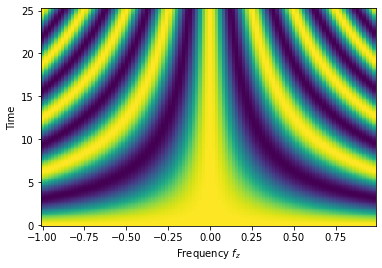

In [5]:
Y, X = np.meshgrid(qub.simulation.timeList, freqSweepFirstTerm.sweepList)
plt.pcolormesh(X, Y, qub.results['sigmax expectation'][0])

plt.xlabel("Frequency $f_{z}$")
plt.ylabel("Time")

Now, we receive the `results` that we stored again as `qub.results['sigmax expectation'][1]` for the second $f_{x}$ value, which returns a list of list, each of which is a time trace corresponding to the frequencies swept for $f_{z}$.

As expected, the expectation value of $\sigma_{x}$ oscillates with different frequencies.

Text(0, 0.5, 'Time')

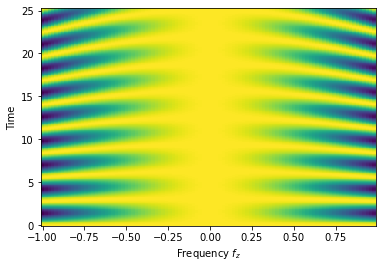

In [6]:
Y, X = np.meshgrid(qub.simulation.timeList, freqSweepFirstTerm.sweepList)
plt.pcolormesh(X, Y, qub.results['sigmax expectation'][1])

plt.xlabel("Frequency $f_{z}$")
plt.ylabel("Time")